In [220]:
import numpy as np 
from help import find_file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(find_file("student_clustering.csv"))

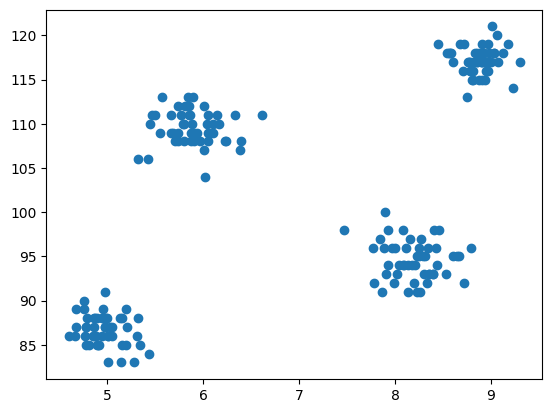

In [6]:
plt.scatter(data.cgpa,data.iq)

In [215]:
class Kmeans_model: 
    def fit_predict(self,data,n_clusters=3,max_iter=1000):
        self.max_iter = max_iter
        self.data = data 
        idx = np.random.choice(data.shape[0], replace=False, size=n_clusters)
        self.centroids  =  np.array(data)[idx]
        # print( self.centroids.shape)
        #print(np.array(self.distances(self.centroids)).shape)
        for i in range(max_iter):
            initial_centers =  self.distances(self.centroids)
            old_centroids =  self.centroids
            # print("Old centroid")
            # print(old_centroids,old_centroids.shape)
            self.centroids =  self.new_centroids(initial_centers)
            # print("NEW CENTROID")
            # print(self.centroids[0],self.centroids.shape)
            #print( self.centroids.shape)

            if (old_centroids ==  self.centroids).all():
                break
        return initial_centers
            
        
    def eucliden_distance(self,a):
        return np.sqrt(np.dot(a,a))
        
    def distances(self,cluster_group):
        cluster_values = []
        distances = []
        for value in np.array(self.data.values):
            for x in cluster_group:
                ed =  self.eucliden_distance(value-x)
                distances.append(ed)
            cluster_values.append(distances.index(min(distances)))
            distances.clear()
        return np.array(cluster_values)
            
                
            #cluster_values.append(np.argmin([self.eucliden_distance(value-x) for x in cluster_group]))

    def new_centroids(self,cluster_group):
        new_centers= []
        for i in np.unique(cluster_group):
            idxs = np.argwhere(cluster_group == i)
            new_centers.append(np.array(self.data)[idxs[0]].mean(axis=0))
        return np.array(new_centers)


In [227]:
model = Kmeans_model()
y_pred = model.fit_predict(data,4)

In [228]:
y_pred_ =  pd.DataFrame({"Pred":y_pred})

In [229]:
df =  pd.concat([data,y_pred_],axis=1)

In [230]:
df.head()

,cgpa,iq,Pred
0,5.13,88,1
1,5.90,113,2
2,8.36,93,3
3,8.27,97,3
4,5.45,110,2


<AxesSubplot: xlabel='cgpa', ylabel='iq'>

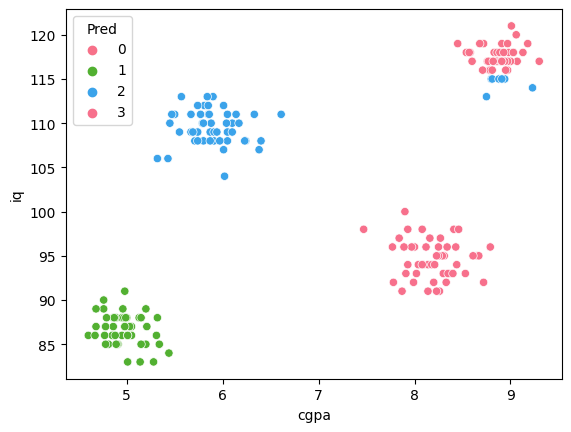

In [232]:
sns.scatterplot(data=df,x='cgpa',y='iq',hue='Pred',palette='husl')